# Chapter 8

.................

## Learning Goals

.....

## Authors

- Mert Candar, mccandar@gmail.com
- Aras Kahraman, aras.kahraman@hotmail.com

## Learning Curve Boosters

https://github.com/justmarkham/pandas-videos

https://github.com/joeyajames/Python/tree/master/Pandas

https://pandas.pydata.org/pandas-docs/stable/reference/

<h1><center><strike>Learn Machine Learning</strike></center></h1>
<h1><center>Learn Statistics</center></h1>

![](https://miro.medium.com/max/970/0*5NrDYk8PryKASFJD)

![](https://corpnce.com/wp-content/uploads/2019/08/AI-Ml-Dl-Ds.jpg)

![](img/5g7lgo.jpg)

![](img/5g7joc.jpg)

![](img/5g7ko1.jpg)

![](img/5g7ky2.jpg)

![](img/5g7l9a.jpg)

![](img/5g7lr4.jpg)

![](img/5g7shy.jpg)

![](img/5g7nht.jpg)

![](img/5g7m0q.jpg)

## Linear Relationship


We will start with inspecting the relations between variables.

![](https://statistics.laerd.com/spss-tutorials/img/lr/linear-nonlinear-relationships.png)

![](https://slidetodoc.com/presentation_image_h/2784606e0d7545ed74e84ba33c1aa308/image-4.jpg)

![](https://datascience.foundation/img/pdf_images/underfitting_and_overfitting_in_machine_learning_some_degrees_and_train_our_model.png)

![](https://miro.medium.com/max/1400/1*ZKLa74o-WDpVt9umDjrhjw.png)

## Linear Regression

Regression line:

$$
\hat{y} = ax + b
$$

Dependent variable:

$$
y = \hat{y} + \epsilon
$$

or in explicit form

$$
y = ax + b + \epsilon
$$

where $\epsilon$ is the error term.

$$
\epsilon \sim \mathcal{N}(\mu,\sigma^{2})
$$

We name $y$ as **dependent variable** as we claim that it depends on some *linear combination* of **independent variable** $x$. Similarly, $\hat{y}$ will be our **regression line** and the two *parameters* $a$ and $b$ will be **slope** and **intersection**, respectively.

In statistics, we accept the fact that our model will always produce **error**, $\epsilon$, and we will try to reduce and measure that error.

![](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch9/img/5214827_03-eng.jpg)
![](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch9/img/5214827_04-eng.jpg)
![](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch9/img/5214827_05-eng.jpg)
![](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch9/img/5214827_06-eng.jpg)
![](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch9/img/5214827_07-eng.jpg)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

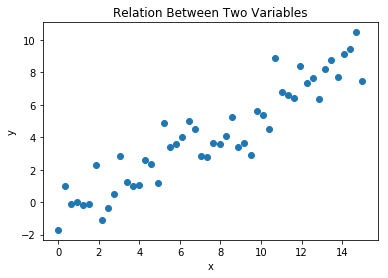

In [34]:
# A Textbook Example

n = 50
np.random.seed(123)

# create our independent variable
x = np.linspace(0,15,n)

# generate random coefficients, we will try to find them using linear regression
a = np.random.uniform() # slope
b = np.random.randn() # intersection
e = np.random.randn(n) # error term

# create our dependent variable
y = a*x + b + e

plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel('y')
plt.title('Relation Between Two Variables')
plt.show()

In [30]:
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     315.7
Date:                Thu, 29 Jul 2021   Prob (F-statistic):           9.59e-23
Time:                        11:28:12   Log-Likelihood:                -76.774
No. Observations:                  50   AIC:                             157.5
Df Residuals:                      48   BIC:                             161.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7866      0.320     -2.462      0.017      -1.429      -0.144
x1             0.6522      0.037     17.767      0.000       0.578       0.726
==============================================================================
Omnibus:                        0.579   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.705
Skew:                           0.209   Prob(JB):                        0.703
Kurtosis:                       2.595   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
print('Estimated intersection parameter:',model.params[0])
print('True intersection parameter:',b)

Estimated intersection parameter: -0.7866270332850218
True intersection parameter: -0.9520972068613222


In [32]:
print('Estimated slope parameter:',model.params[1])
print('True slope parameter:',a)

Estimated slope parameter: 0.6522418127403078
True slope parameter: 0.6964691855978616


### Goodness of Fit

Standard Error of the regression:

$$
se = \sqrt{\frac{1}{N}\sum(y - \hat{y})^2}
$$



...............


$$
r^2 = \frac{SSE}{........}
$$

![](https://vitalflux.com/wp-content/uploads/2020/09/Regression-terminologies-Page-3.png)

![](https://www.mathsisfun.com/data/images/least-squares2.svg)

**We try to minimize the error. Namely, the total sum of squares of vertical difference between each data point and the regression line.**

How to minimize this total distance?

### Ordinary Least Squares

$$
min f(x,y) = \sum^{N}_{i=1}(y - \hat{y}_i)^2
$$

$$
= \sum^{N}_{i=1}(y - (ax_i + b))^2
$$

![](https://www.researchgate.net/profile/Rui-Perdigao-2/publication/256972221/figure/fig1/AS:392590982696969@1470612392539/Time-evolution-of-the-mean-quadratic-error-in-the-presence-of-both-initial-condition-and.png)

We could take derivates with respect to the parameters, and set the equation to zero. This could give us the parameters that minimize the squared error.

$$
\frac{\partial f}{\partial a} = 0
$$

$$
\frac{\partial}{\partial a} \left( \sum^{N}_{i=1}(y - (ax_i + b))^2 \right) = 0
$$

We found a as:

$$
a = \frac{\sum x_iy_i}{\sum x^{2}_{i}}
$$

Likewise for b,

$$
\frac{\partial f}{\partial b} = 0
$$

$$
\frac{\partial}{\partial b} \left( \sum^{N}_{i=1}(y - (ax_i + b))^2 \right) = 0
$$

$$
b = \bar{y} - a\bar{x}
$$

where $\bar{x}$ is the mean of $x$

$$
\bar{x} = \frac{1}{N} \sum^{N}_{i=1} x_i
$$

## Important Blog Pages

http://colah.github.io/

http://mark.reid.name/blog/

http://karpathy.github.io/


## Other Several Readings

https://www.kdnuggets.com/2021/01/data-scientist-dont-start-machine-learning.html

https://www.kdnuggets.com/2018/04/dont-learn-machine-learning-24-hours.html

https://medium.datadriveninvestor.com/good-grief-stop-trying-to-learn-machine-learning-1b12a7d749a7

https://www.quora.com/Is-it-true-that-I-should-not-learn-machine-learning-and-artificial-intelligence-if-I-am-not-good-at-data-structures-and-algorithms

## Videos

https://www.youtube.com/watch?v=reY50t2hbuM&ab_channel=SmithaKolan-MachineLearningEngineer

## Bonus: Youtube Channel

https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw

# References

Gujarati, D., Porter, D., *Essentials of Econometrics*, McGraw-Hill Education (2009)

https://www.kdnuggets.com/2018/04/dont-learn-machine-learning-24-hours.html

https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch9/scatter-nuages/5214827-eng.htm#:~:text=positive%20or%20direct%20relationships%20between,non%2Dlinear%20patterns